# Problem statement:

Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset. Determine the number of clusters using the elbow method.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [3]:
dataset = pd.read_csv('sales_data_sample.csv', encoding='Latin-1')

In [4]:
dataset.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
dataset.shape

(2823, 25)

In [6]:
for i in dataset.columns:
    print(dataset[i].value_counts())
    
## Numerical STATUS, PRODUCTLINE, DEALSIZE
## Drop ['CUSTOMERNAME' , 'PRODUCTCODE', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME']

10332    18
10106    18
10159    18
10168    18
10398    18
         ..
10242     1
10189     1
10286     1
10216     1
10294     1
Name: ORDERNUMBER, Length: 307, dtype: int64
34    112
21    103
46    101
27    100
31     97
41     97
45     97
26     96
29     94
48     94
25     94
20     93
33     92
22     92
32     91
24     91
38     91
49     91
36     89
44     89
37     87
43     85
39     84
28     82
40     78
42     76
30     75
23     73
35     71
47     70
50     65
55     16
66      5
15      4
51      4
61      3
18      3
60      3
76      3
59      3
56      3
19      3
64      3
10      2
6       2
11      2
54      2
70      2
97      1
85      1
62      1
52      1
16      1
13      1
58      1
65      1
12      1
77      1
Name: QUANTITYORDERED, dtype: int64
100.00    1304
59.87        6
96.34        6
57.73        5
80.55        5
          ... 
48.30        1
87.96        1
36.21        1
98.48        1
62.24        1
Name: PRICEEACH, Length: 1016, dtype: int6

In [7]:
dataset.drop(['CUSTOMERNAME' , 'PRODUCTCODE', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'], axis=1,inplace=True)

In [8]:
dataset.shape

(2823, 13)

In [9]:
dataset.dropna(inplace=True)

In [10]:
dataset.shape

(2823, 13)

In [11]:
dataset.dtypes

ORDERNUMBER          int64
QUANTITYORDERED      int64
PRICEEACH          float64
ORDERLINENUMBER      int64
SALES              float64
ORDERDATE           object
STATUS              object
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE         object
MSRP                 int64
DEALSIZE            object
dtype: object

In [12]:
dataset.drop(['ORDERDATE'], axis=1,inplace=True)

In [13]:
dataset.shape

(2823, 12)

In [14]:
dataset.STATUS.value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

In [15]:
status_dict = {"Shipped":"0","Cancelled":"1","Resolved":"2","On Hold":"3","In Process":"4","Disputed":"5"}

def process(text):
    text = text.replace('Shipped', status_dict['Shipped']).replace('Cancelled', status_dict['Cancelled']).replace('Resolved', status_dict['Resolved']).replace('On Hold', status_dict['On Hold']).replace('In Process', status_dict['In Process']).replace('Disputed', status_dict['Disputed'])
    text = text.encode("utf8").decode("ascii",'ignore')
    text = " ".join(text.split())
    return text

dataset.STATUS = dataset.STATUS.apply(process)

In [16]:
dataset.STATUS = dataset.STATUS.astype(int)

In [17]:
dataset.STATUS.dtype

dtype('int32')

In [18]:
dataset.STATUS.value_counts()

0    2617
1      60
2      47
3      44
4      41
5      14
Name: STATUS, dtype: int64

In [19]:
dataset.DEALSIZE.value_counts()

Medium    1384
Small     1282
Large      157
Name: DEALSIZE, dtype: int64

In [20]:
dealsize_dict = {"Small":"0","Medium":"1","Large":"2"}

def process(text):
    text = text.replace('Small', dealsize_dict['Small']).replace('Medium', dealsize_dict['Medium']).replace('Large', dealsize_dict['Large'])
    text = text.encode("utf8").decode("ascii",'ignore')
    text = " ".join(text.split())
    return text

dataset.DEALSIZE = dataset.DEALSIZE.apply(process)

In [21]:
dataset.DEALSIZE = dataset.DEALSIZE.astype(int)

In [22]:
dataset.DEALSIZE.dtypes

dtype('int32')

In [23]:
dataset.DEALSIZE.value_counts()

1    1384
0    1282
2     157
Name: DEALSIZE, dtype: int64

In [24]:
dataset.PRODUCTLINE.value_counts()

Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: PRODUCTLINE, dtype: int64

In [25]:
prodline_dict = {"Classic Cars":"0","Vintage Cars":"1","Motorcycles":"2","Planes":"3","Trucks and Buses":"4","Ships":"5","Trains":"6"}

def process(text):
    text = text.replace("Classic Cars", prodline_dict["Classic Cars"]).replace("Vintage Cars", prodline_dict["Vintage Cars"]).replace("Motorcycles", prodline_dict["Motorcycles"]).replace("Planes", prodline_dict["Planes"]).replace("Trucks and Buses", prodline_dict["Trucks and Buses"]).replace("Ships", prodline_dict["Ships"]).replace("Trains", prodline_dict["Trains"])
    text = text.encode("utf8").decode("ascii",'ignore')
    text = " ".join(text.split())
    return text

dataset.PRODUCTLINE = dataset.PRODUCTLINE.apply(process)

In [26]:
dataset.PRODUCTLINE= dataset.PRODUCTLINE.astype(int)

In [27]:
dataset.PRODUCTLINE.value_counts()

0    967
1    607
2    331
3    306
4    301
5    234
6     77
Name: PRODUCTLINE, dtype: int64

In [28]:
dataset.PRODUCTLINE.dtype

dtype('int32')

## K-Means Clustering

In [29]:
X = dataset.values

In [30]:
X.shape

(2823, 12)

In [31]:
from sklearn.cluster import KMeans
import seaborn as sns

In [32]:
# Within Cluster Sum of Squares
wcss = []

In [33]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

<AxesSubplot:>

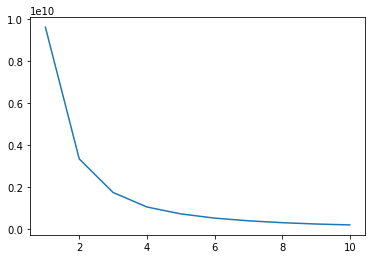

In [34]:
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x=ks, y=wcss)

In [35]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans) 

[0 0 1 ... 4 3 0]


In [36]:
# plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
#             s=60, c='red', label='Cluster1')
# plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
#             s=60, c='blue', label='Cluster2')

# plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=60, c='green', label= 'Cluster3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1],
#             s=60, c='violet', label='Cluster4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1],
#             s=60, c='yellow', label='Cluster5')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
#             :, 1], s=100, c='black', label='Centroids')
# plt.xlabel('Deal Size') 
# plt.ylabel('') 
# plt.legend()

# plt.show()


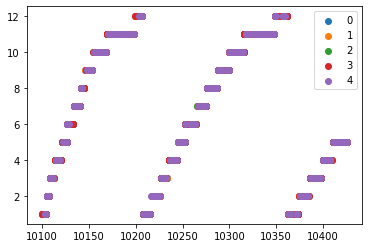

In [37]:
label = y_kmeans
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X[y_kmeans == i , 0] , X[y_kmeans == i , 7] , label = i)
plt.legend()
plt.show()

In [38]:
dataset.shape

(2823, 12)

In [39]:
dataset.head(2823)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,DEALSIZE
0,10107,30,95.70,2,2871.00,0,1,2,2003,2,95,0
1,10121,34,81.35,5,2765.90,0,2,5,2003,2,95,0
2,10134,41,94.74,2,3884.34,0,3,7,2003,2,95,1
3,10145,45,83.26,6,3746.70,0,3,8,2003,2,95,1
4,10159,49,100.00,14,5205.27,0,4,10,2003,2,95,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,0,4,12,2004,5,54,0
2819,10373,29,100.00,1,3978.51,0,1,1,2005,5,54,1
2820,10386,43,100.00,4,5417.57,2,1,3,2005,5,54,1
2821,10397,34,62.24,1,2116.16,0,1,3,2005,5,54,0


<AxesSubplot:>

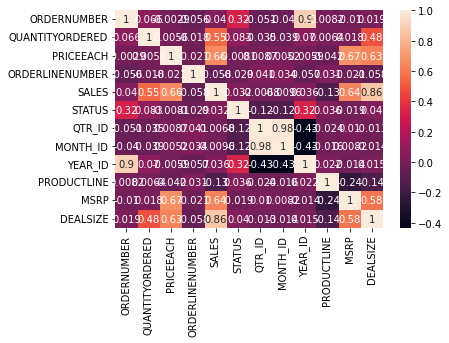

In [40]:
sns.heatmap(dataset.corr(), annot=True)